In [45]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
import sys
sys.path.append('../src')

In [48]:
# load the dataset
df = pd.read_csv('../data/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [49]:
# let's check if every day has 24 records for each hour
counts = df["dteday"].value_counts()
not_full_data = counts[counts < 24].sort_values(ascending=True)
print(f"Number of days with less than 24 records: {len(not_full_data)}")
not_full_data

Number of days with less than 24 records: 76


2012-10-29     1
2011-01-27     8
2012-10-30    11
2011-01-18    12
2011-01-26    16
              ..
2011-02-13    23
2011-01-25    23
2011-12-26    23
2011-01-28    23
2012-02-21    23
Name: dteday, Length: 76, dtype: int64

In [50]:
# as we can see there are some days with less than 24 records - mostly 22 or 23 but some have a lot less records - what could have happened?

In [51]:
# 2012-10-29 and 30: https://www.washingtonpost.com/blogs/liveblog/wp/2012/10/29/live-blog-hurricane-sandy-news/
# 2011-01-26 and 27: https://en.wikipedia.org/wiki/January_25%E2%80%9327,_2011_North_American_blizzard
# 2011-08-27 and 28: https://en.wikipedia.org/wiki/Hurricane_Irene

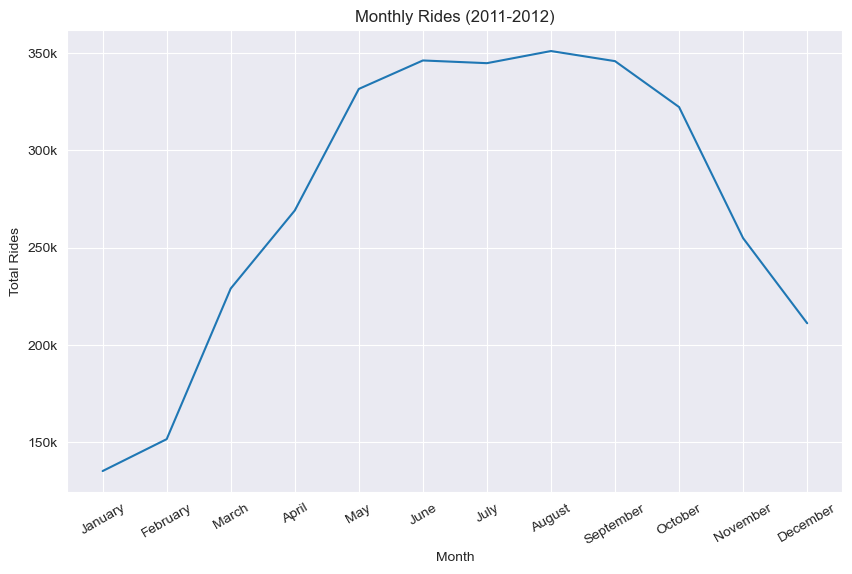

In [52]:
# group the data by month
months_map = {1: 'January',
              2: 'February', 
              3: 'March', 
              4: 'April', 
              5: 'May', 
              6: 'June', 
              7: 'July', 
              8: 'August', 
              9: 'September', 
              10: 'October', 
              11: 'November', 
              12: 'December'}
monthly_rides = df.groupby(["mnth"]).agg({"cnt": "sum"})

ax = monthly_rides.plot(figsize=(10,6), title="Monthly Rides (2011-2012)", xlabel="Month", ylabel="Total Rides", rot=30, legend=False)
ax.xaxis.set_major_locator(plt.FixedLocator([i for i in range(1,13)]))
ax.yaxis.set_major_locator(plt.FixedLocator([l for l in ax.get_yticks()]))
ax.set_yticklabels([f"{i / 1000:,.0f}k" for i in ax.get_yticks()])
ax.set_xticklabels([months_map[i] for i in range(1,13)])
plt.show()

In [53]:
# as we can see the rides are increasing from January to June and then decreasing from July to December
# the peak is in the summer months - as expected

In [54]:
# now I want to compare monthly rides for 2011 and 2012
# 0 - 2011, 1 - 2012 as mentioned in the readme file
monthly_rides_2011 = df[df["yr"] == 0].groupby(["mnth"]).agg({"cnt": "sum"})
monthly_rides_2012 = df[df["yr"] == 1].groupby(["mnth"]).agg({"cnt": "sum"})

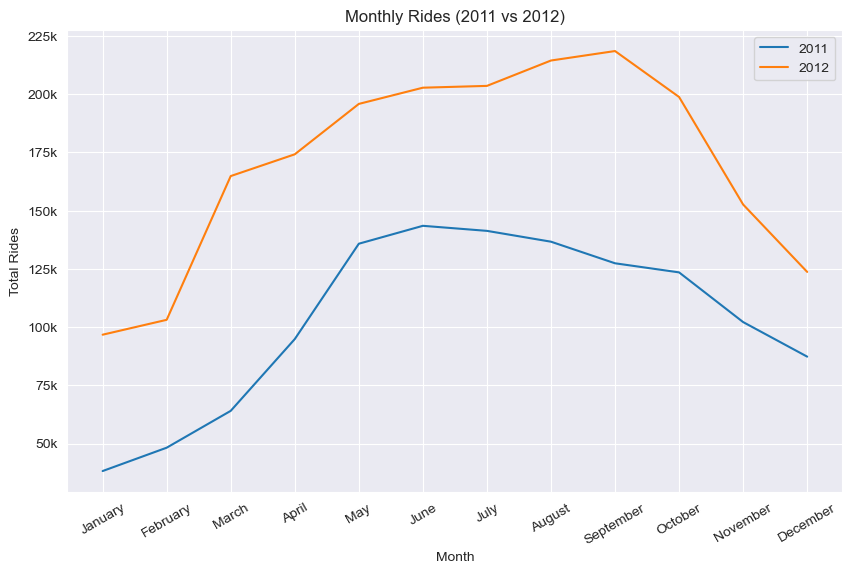

In [55]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(monthly_rides_2011, label="2011")
ax.plot(monthly_rides_2012, label="2012")
ax.set_xlabel("Month")
ax.set_ylabel("Total Rides")
ax.xaxis.set_major_locator(plt.FixedLocator(np.linspace(1,12,12)))
ax.yaxis.set_major_locator(plt.FixedLocator([l for l in ax.get_yticks()]))
ax.set_xticks(np.linspace(1,12,12))
ax.set_xticklabels(months_map.values(), rotation=30)
ax.set_yticklabels([f"{i / 1000:,.0f}k" for i in ax.get_yticks()])
ax.legend()
ax.set_title("Monthly Rides (2011 vs 2012)")
plt.show()

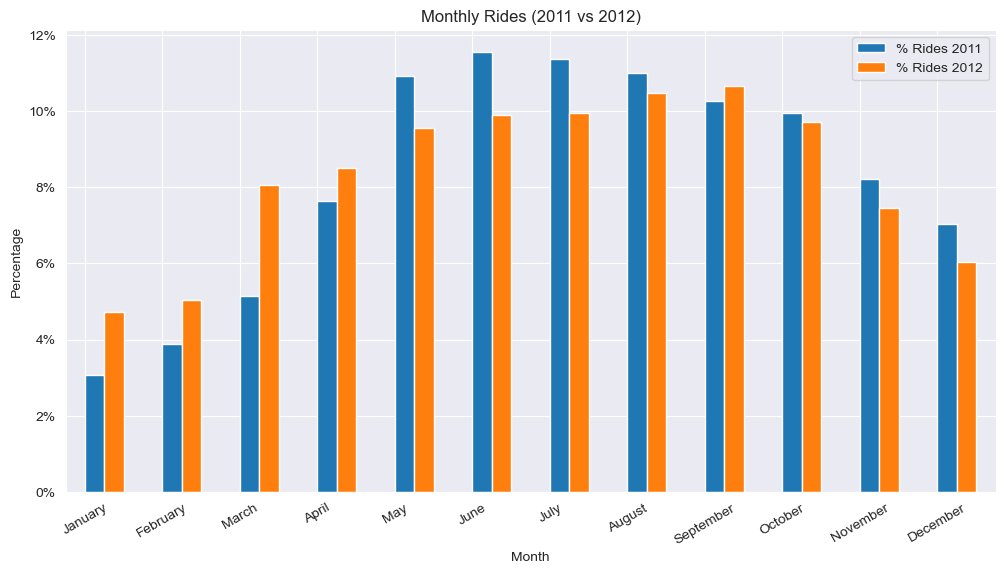

In [56]:
# let's compare the percentage in rides between 2011 and 2012
monthly_rides_2011["percentage_cnt"] = monthly_rides_2011["cnt"] / monthly_rides_2011["cnt"].sum()
monthly_rides_2012["percentage_cnt"] = monthly_rides_2012["cnt"] / monthly_rides_2012["cnt"].sum()
rides_side_by_side = pd.concat([monthly_rides_2011["percentage_cnt"].rename("% Rides 2011"), 
                                monthly_rides_2012["percentage_cnt"].rename("% Rides 2012")],
                                axis=1)
ax = rides_side_by_side.plot(kind="bar", 
                             figsize=(12,6), 
                             title="Monthly Rides (2011 vs 2012)",
                             xlabel="Month", 
                             ylabel="Percentage",
                             align="edge"
                             )
ax.set_xticks(np.linspace(0,11,12))
ax.yaxis.set_major_locator(plt.FixedLocator([l for l in ax.get_yticks()]))
ax.set_yticklabels([f"{i * 100:,.0f}%" for i in ax.get_yticks()])
ax.set_xticklabels(months_map.values(), rotation=30)
plt.show()

In [57]:
# as we can see the company was growing, the rides were increasing from 2011 to 2012 in all months
# from the plot we might assume that the weather was better in autumn 2012 - lets check

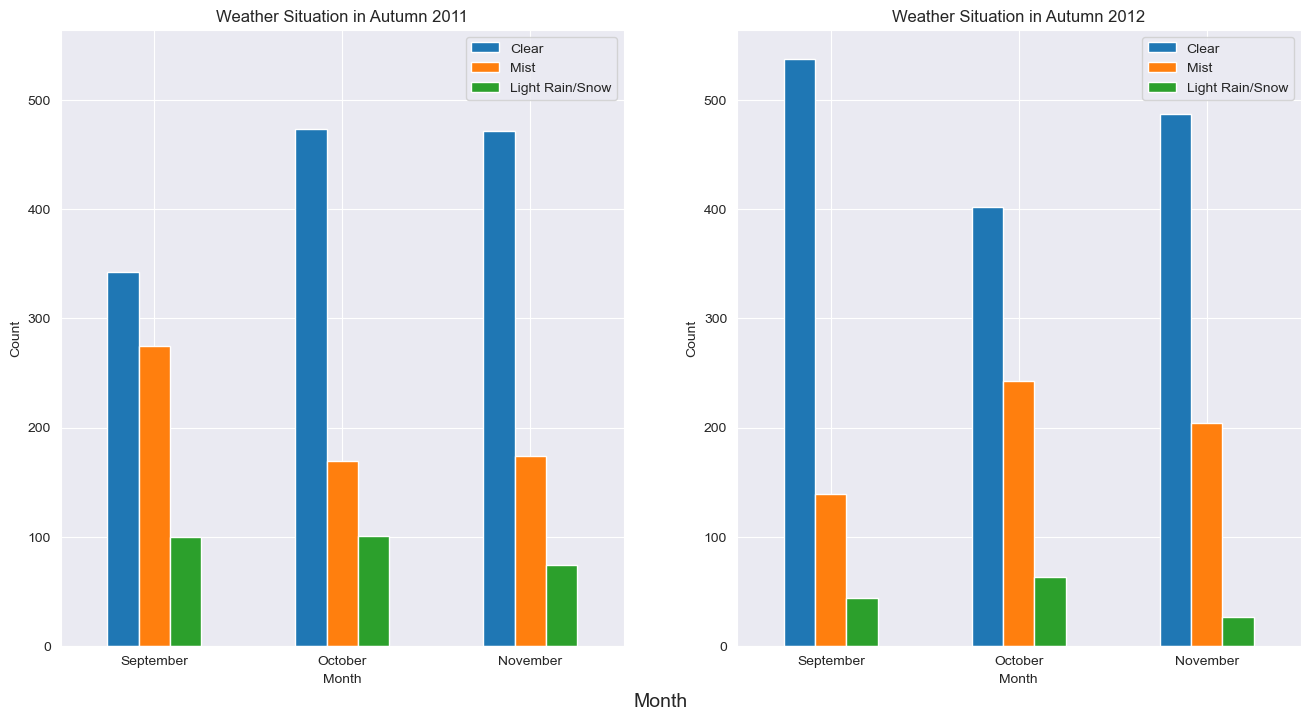

In [58]:
month_to_code = {v: k for k, v in months_map.items()}
autumn_months = ["September", "October", "November"]
weather_map = {1: "Clear", 2: "Mist", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"}
autumn_rides_2011 = df[(df["yr"] == 0) & (df["mnth"].isin([month_to_code[m] for m in autumn_months]))].groupby(["mnth"])
autumn_rides_2012 = df[(df["yr"] == 1) & (df["mnth"].isin([month_to_code[m] for m in autumn_months]))].groupby(["mnth"])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.text(0.5, 0.04, 'Month', ha='center', va='center', fontsize=14)

ax1 = autumn_rides_2011.apply(lambda x: x["weathersit"].value_counts()).plot(kind="bar", ax=ax1, title="Weather Situation in Autumn 2011", xlabel="Month", ylabel="Count", rot=0)
ax1.legend([weather_map[i] for i in range(1,5)])
ax1.set_xticklabels(autumn_months)

ax2 = autumn_rides_2012.apply(lambda x: x["weathersit"].value_counts()).plot(kind="bar", ax=ax2, title="Weather Situation in Autumn 2012", xlabel="Month", ylabel="Count", rot=0)
ax2.legend([weather_map[i] for i in range(1,5)])
ax2.set_xticklabels(autumn_months)

y_min = min(ax1.get_ylim()[0], ax2.get_ylim()[0])
y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

plt.show()

In [59]:

autumn_rides_2011.apply(lambda x: x["weathersit"].value_counts().sum())

mnth
9     717
10    743
11    719
dtype: int64

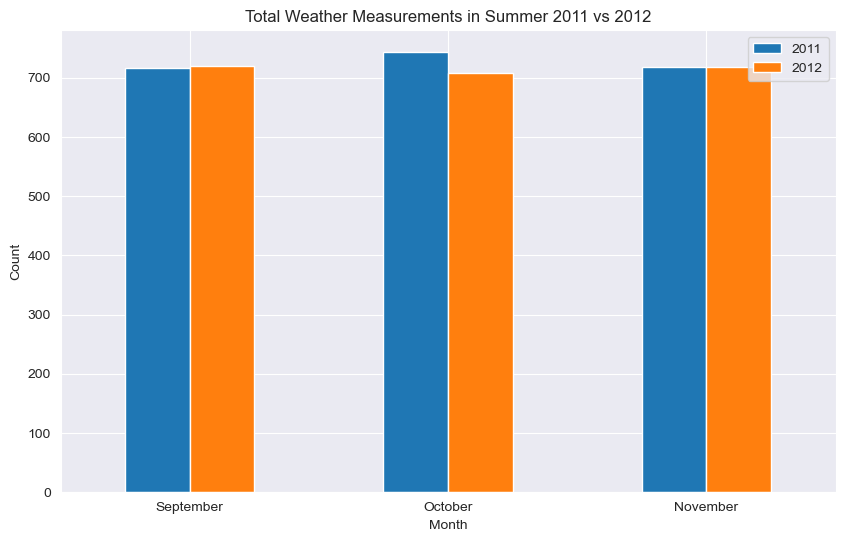

In [60]:
total_measurements_2012 = autumn_rides_2012.apply(lambda x: x["weathersit"].value_counts().sum())
total_measurements_2011 = autumn_rides_2011.apply(lambda x: x["weathersit"].value_counts().sum())
ax = pd.concat([total_measurements_2011.rename("2011"), total_measurements_2012.rename("2012")], axis=1).plot(kind="bar", figsize=(10,6), title="Total Weather Measurements in Summer 2011 vs 2012", xlabel="Month", ylabel="Count", rot=0)
ax.set_xticklabels(autumn_months)
plt.show()

In [61]:
# As we can see the weather in the September was much worse in 2011 than in 2012 - it might be the reason for the decrease in rides in this month
# what about the summer months?

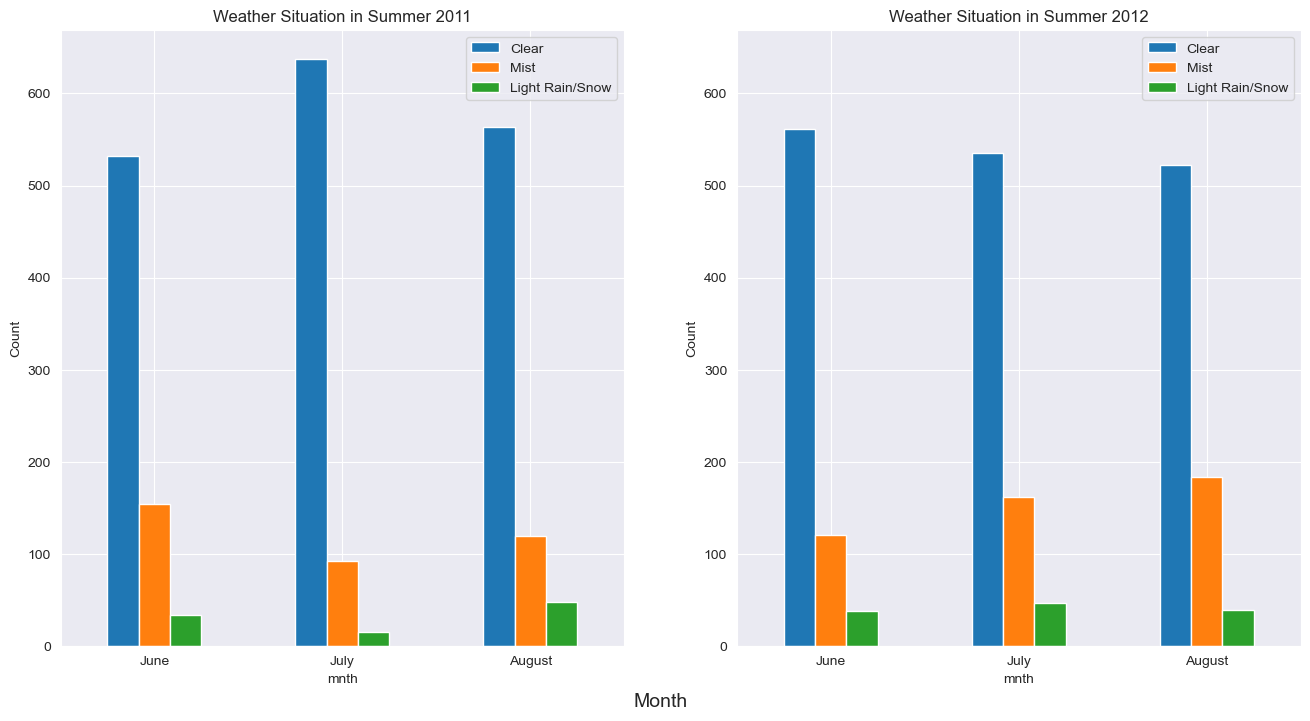

In [62]:
summer_months = ["June", "July", "August"]
summer_rides_2011 = df[(df["yr"] == 0) & (df["mnth"].isin([month_to_code[m] for m in summer_months]))].groupby(["mnth"])
summer_rides_2012 = df[(df["yr"] == 1) & (df["mnth"].isin([month_to_code[m] for m in summer_months]))].groupby(["mnth"])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.text(0.5, 0.04, 'Month', ha='center', va='center', fontsize=14)

ax1 = summer_rides_2011.apply(lambda x: x["weathersit"].value_counts()).plot(kind="bar", ax=ax1, title="Weather Situation in Summer 2011", ylabel="Count", rot=0)
ax1.legend([weather_map[i] for i in range(1,5)])
ax1.set_xticklabels(summer_months)

ax2 = summer_rides_2012.apply(lambda x: x["weathersit"].value_counts()).plot(kind="bar", ax=ax2, title="Weather Situation in Summer 2012", ylabel="Count", rot=0)
ax2.legend([weather_map[i] for i in range(1,5)])
ax2.set_xticklabels(summer_months)

y_min = min(ax1.get_ylim()[0], ax2.get_ylim()[0])
y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

plt.show()

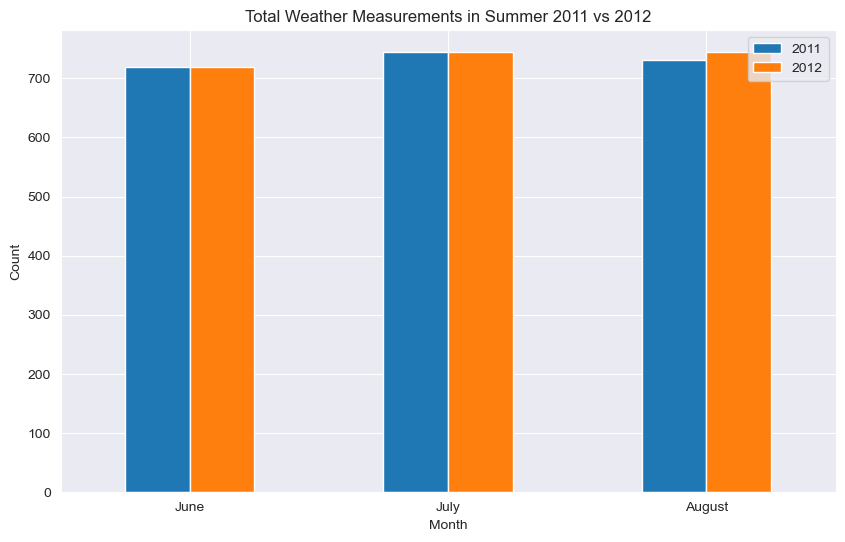

In [63]:
# to measure the quality of the comparision we need to check if the total measurements in the summer months are similar
total_measurements_2012 = summer_rides_2012.apply(lambda x: x["weathersit"].value_counts().sum())
total_measurements_2011 = summer_rides_2011.apply(lambda x: x["weathersit"].value_counts().sum())
ax = pd.concat([total_measurements_2011.rename("2011"), total_measurements_2012.rename("2012")], axis=1).plot(kind="bar", figsize=(10,6), title="Total Weather Measurements in Summer 2011 vs 2012", xlabel="Month", ylabel="Count", rot=0)
ax.set_xticklabels(summer_months)
plt.show()

In [64]:
# lets see the differences in the weather situation in the summer months
summer_diff = summer_rides_2012.apply(lambda x: x["weathersit"].value_counts()) - summer_rides_2011.apply(lambda x: x["weathersit"].value_counts())

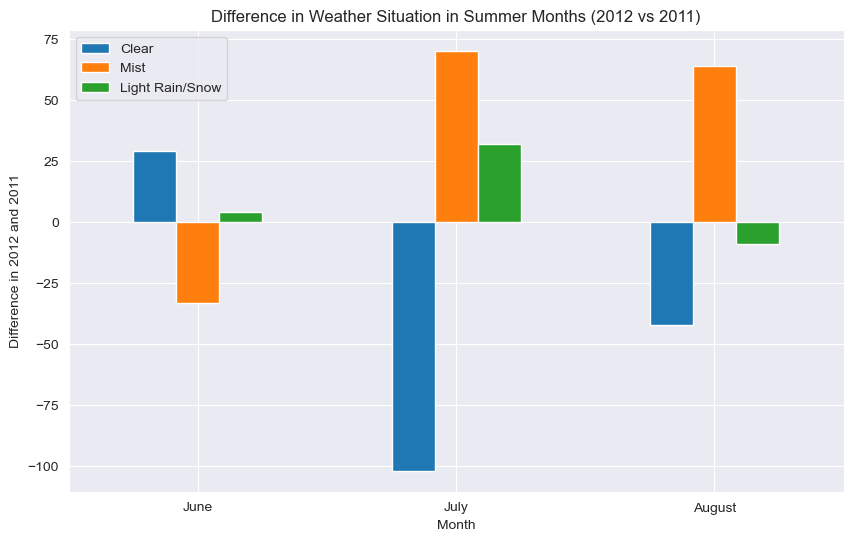

In [65]:
ax = summer_diff.plot(kind="bar", figsize=(10,6), title="Difference in Weather Situation in Summer Months (2012 vs 2011)", xlabel="Month", ylabel="Difference in 2012 and 2011", rot=0)
ax.legend([weather_map[i] for i in range(1,5)])
ax.set_xticklabels(summer_months)
plt.show()

In [66]:
# As we can see there were a lot more clear days in 2011 than in 2012 - it might be the reason for the decrease in percentage rides in the summer months for 2012

In [67]:
# let's check the temperature in the summer months

In [68]:
# renormalizing the temperature
df["temp_norm"] = round(df["temp"] * 41, 1)

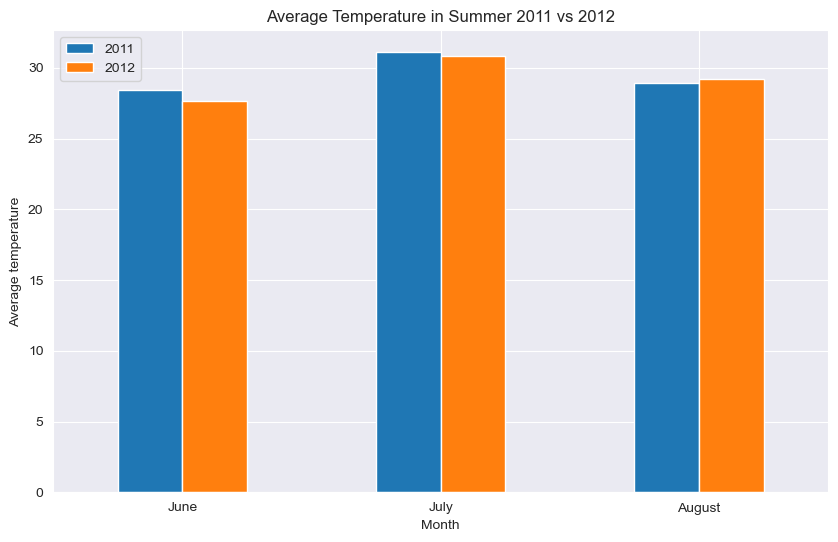

In [69]:
summer_temp_2011 = df[(df["yr"] == 0) & (df["mnth"].isin([month_to_code[m] for m in summer_months]))].groupby([ "mnth"])
summer_temp_2012  = df[(df["yr"] == 1) & (df["mnth"].isin([month_to_code[m] for m in summer_months]))].groupby(["mnth"])
avg2011 = summer_temp_2011.apply(lambda x: x["temp_norm"].mean())
avg2012 = summer_temp_2012.apply(lambda x: x["temp_norm"].mean())
comparison = pd.concat([avg2011.rename("2011"), avg2012.rename("2012")], axis=1)
ax = comparison.plot(kind="bar", figsize=(10,6), title="Average Temperature in Summer 2011 vs 2012", xlabel="Month", ylabel="Average temperature", rot=0)
ax.set_xticklabels(summer_months)
plt.show()

In [70]:
# as we can see average temperatures are almost equal in both years - it is not the reason for the decrease in percentage rides in the summer months for 2012

In [71]:
# has the amount of registered and casual users changed between 2011 and 2012?

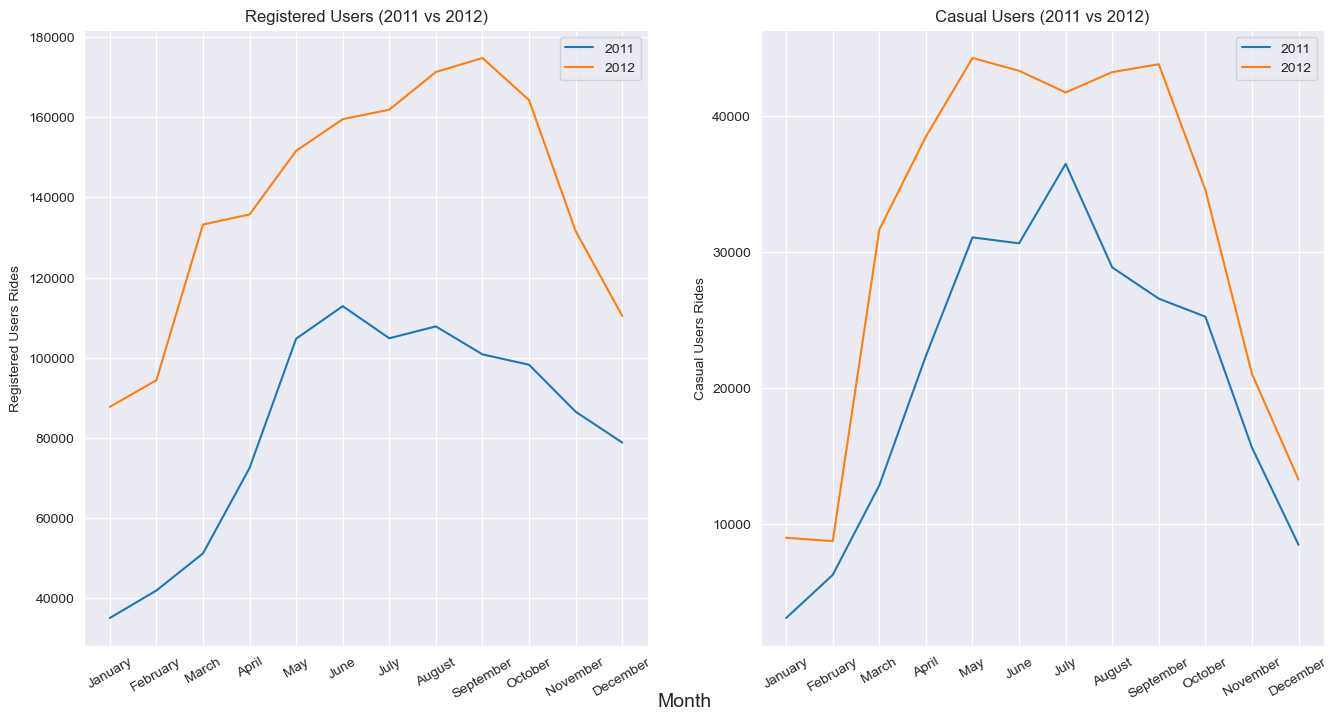

In [72]:
registered_2011 = df[(df["yr"] == 0)].groupby(["mnth"]).agg({"registered": "sum"})
registered_2012 = df[(df["yr"] == 1)].groupby(["mnth"]).agg({"registered": "sum"})
casual_2011 = df[(df["yr"] == 0)].groupby(["mnth"]).agg({"casual": "sum"})
casual_2012 = df[(df["yr"] == 1)].groupby(["mnth"]).agg({"casual": "sum"})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.text(0.5, 0.04, 'Month', ha='center', va='center', fontsize=14)

ax1.plot(registered_2011, label="2011")
ax1.plot(registered_2012, label="2012")
ax1.set_title("Registered Users (2011 vs 2012)")
ax1.legend()
ax1.set_xticks(np.arange(1,13), labels=months_map.values(), rotation=30)
ax1.set_ylabel("Registered Users Rides")

ax2.plot(casual_2011, label="2011")
ax2.plot(casual_2012, label="2012")
ax2.set_title("Casual Users (2011 vs 2012)")
ax2.legend()
ax2.set_ylabel("Casual Users Rides")
ax2.set_xticks(np.arange(1,13), labels=months_map.values(), rotation=30)
plt.show()

In [73]:
# there was a sharp increase in casual user rides in july - maybe there was some promotion going on?
# let's see in which days of the week the rides were the most popular

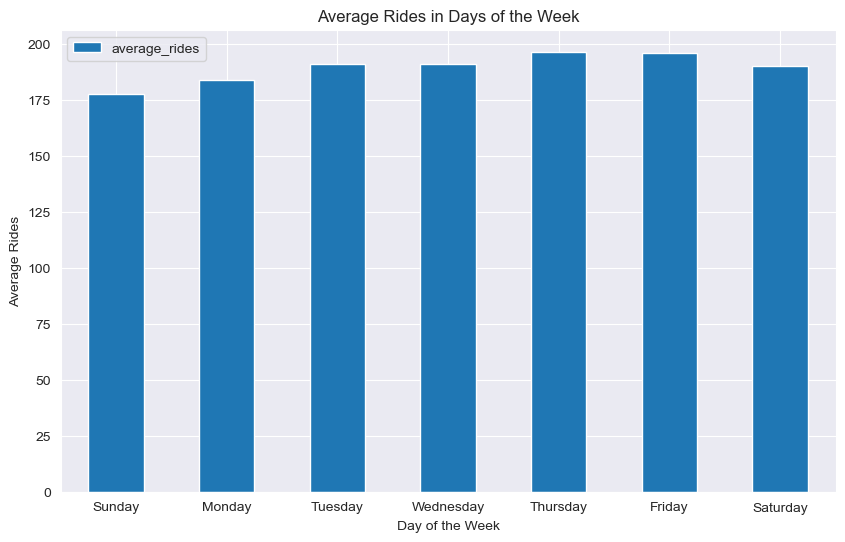

In [74]:
week_groups = df.groupby(["weekday"]).agg({"cnt": "mean"}).rename({"cnt": "average_rides"}, axis=1)
weekdays = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
ax = week_groups.plot(kind="bar", figsize=(10,6), title="Average Rides in Days of the Week", xlabel="Day of the Week", ylabel="Average Rides", rot=0)
ax.set_xticklabels(weekdays)
plt.show()

In [75]:
# there seems to be no strong correlation between the day of the week and the number of rides

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

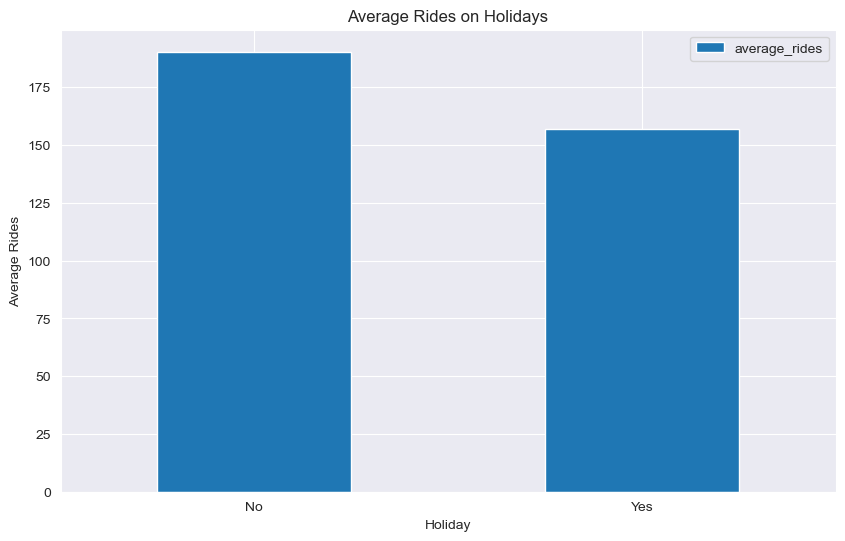

In [76]:
holiday_groups = df.groupby(["holiday"]).agg({"cnt": "mean"}).rename({"cnt": "average_rides"}, axis=1)
ax = holiday_groups.plot(kind="bar", figsize=(10,6), title="Average Rides on Holidays", xlabel="Holiday", ylabel="Average Rides", rot=0)
ax.set_xticklabels(["No", "Yes"])

In [77]:
# as we can see the number of rides is higher on non-holidays - it is not surprising as people are going to work
# how about working days?

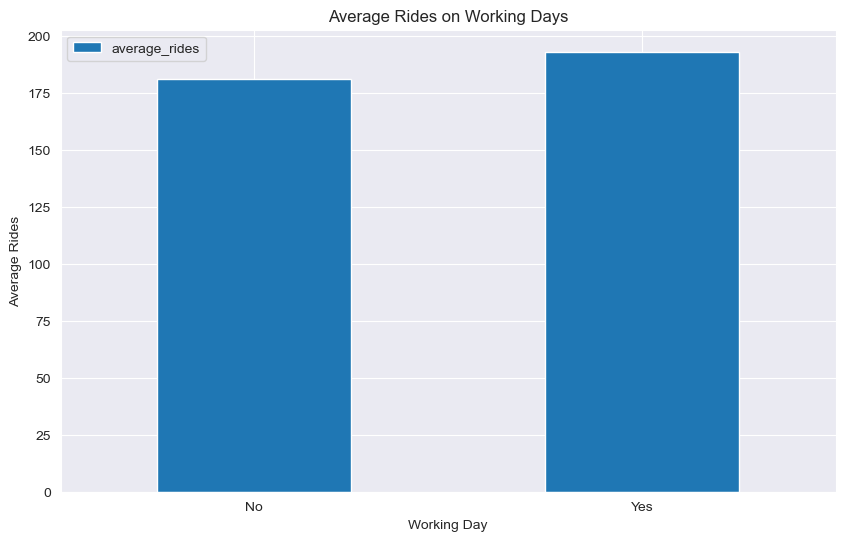

In [78]:
workingday_groups = df.groupby(["workingday"]).agg({"cnt": "mean"}).rename({"cnt": "average_rides"}, axis=1)
ax = workingday_groups.plot(kind="bar", figsize=(10,6), title="Average Rides on Working Days", xlabel="Working Day", ylabel="Average Rides", rot=0)
ax.set_xticklabels(["No", "Yes"])
plt.show()

In [79]:
# the number of rides is a bit higher on working days, but not a lot, it resembles the number of rides depending on the day of the week

In [80]:
# lets see how does the number of rides change day-to-day
df["day_date"] = pd.to_datetime(df["dteday"])
rides_2011 = df[df["yr"] == 0].resample("D", on="day_date").agg({"cnt": "sum"}).rename({"cnt": "rides"}, axis=1)
rides_change_2011 = rides_2011.shift(1) - rides_2011
# normalize the change
# rides_change["cnt"] = rides_change["cnt"].fillna(0).plot(figsize=(10,6), title="Change in Rides Day-to-Day (2011)", xlabel="Date", ylabel="Change in Rides")


[]

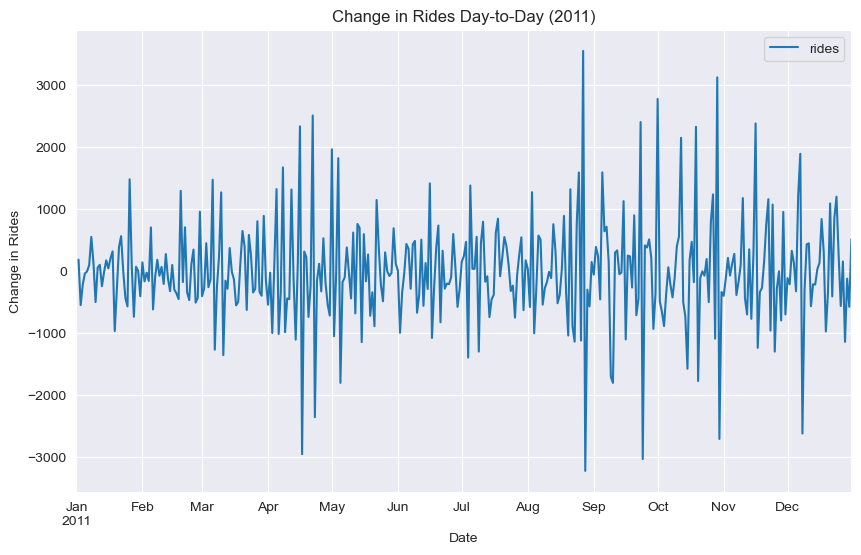

In [81]:
rides_change_2011.plot(figsize=(10,6), title="Change in Rides Day-to-Day (2011)", xlabel="Date", ylabel="Change in Rides")
plt.plot()

In [82]:
def display_change(date_start, date_end, df, shift=1):
    fig, ax = plt.subplots(figsize=(10,6))
    data = df[((date_start <= df["dteday"]) & (df["dteday"]  <= date_end))].resample("D", on="day_date").agg({"cnt": "sum"}).rename({"cnt": "rides"}, axis=1)
    change = data.shift(shift) - data
    ax.plot(change, label="Change in Rides")
    ax.set_title(f"Change in Rides Day-to-Day ({date_start} - {date_end})")
    ax.set_xlabel("Date")
    ax.set_ylabel("Change in Rides")
    ax.set_xticks(ax.get_xticks()[:-1])
    ax.legend()
    plt.tight_layout()
    plt.show()

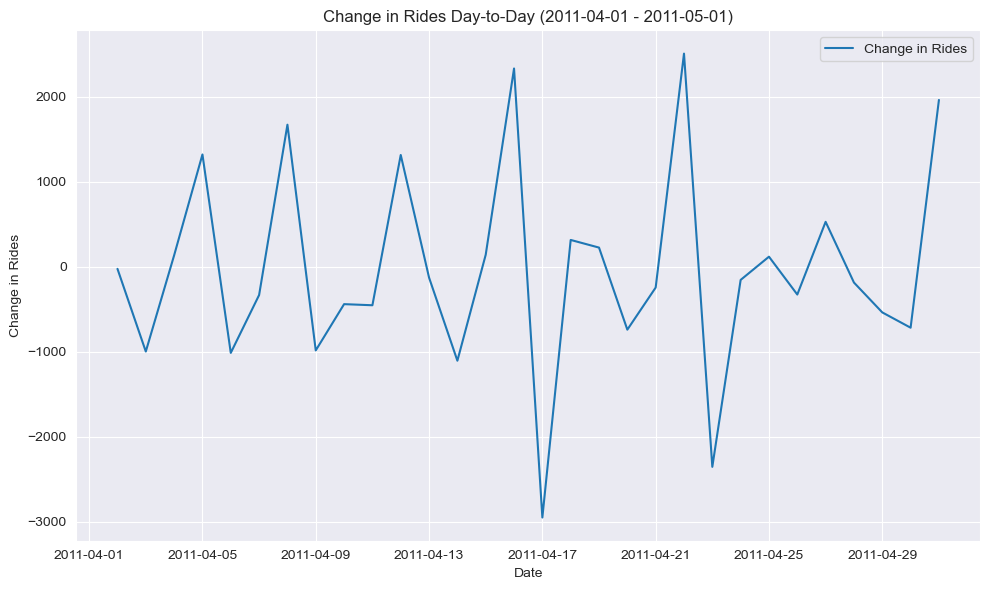

In [83]:
display_change("2011-04-01", "2011-05-01", df)

In [84]:
# there doesnt seem to be any specific events related to the change in rides in this period, maybe the weather was bad?
weather_data = df[(df["dteday"] >= "2011-04-14") & (df["dteday"] <= "2011-04-17")][["dteday", "weathersit"]]
weather_data["weathersit"] = weather_data["weathersit"].apply(lambda x: weather_map[x])
weather_data["dteday"] = pd.to_datetime(weather_data["dteday"])
weather_data.groupby(["dteday"]).agg({"weathersit": "value_counts"}).rename({"weathersit": "hours_count"}, axis=1)

hours_count
dteday     weathersit                  
2011-04-14 Clear                     24
2011-04-15 Clear                     18
           Mist                       6
2011-04-16 Light Rain/Snow           12
           Mist                      12
2011-04-17 Clear                     23
           Mist                       1

In [85]:
# how about the wind speed?
wind_data = df[(df["dteday"] >= "2011-04-14") & (df["dteday"] <= "2011-04-17")][["dteday", "windspeed"]]
wind_data["dteday"] = pd.to_datetime(wind_data["dteday"])
wind_data["windspeed_renormalized"] = wind_data["windspeed"] * 67
wind_data = wind_data.groupby(["dteday"]).agg({"windspeed_renormalized": "mean"}).rename({"windspeed_renormalized": "average_windspeed"}, axis=1)
wind_data["average_windspeed"] = wind_data["average_windspeed"].round(2)
wind_data


,average_windspeed
dteday,
2011-04-14,7.42
2011-04-15,15.17
2011-04-16,22.83
2011-04-17,20.33


In [86]:
(df["windspeed"] * 67).describe()

count    17379.000000
mean        12.736540
std          8.196795
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [87]:
# the wind speed in 16th and 17th of April was higher than the average - it might be the reason for the decrease in rides

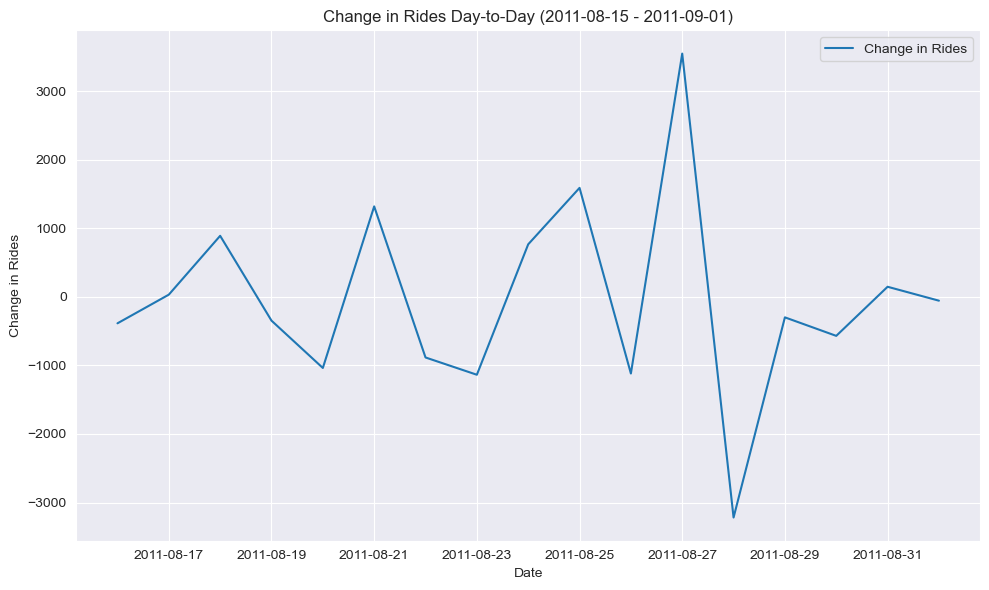

In [88]:
display_change("2011-08-15", "2011-09-01", df)

In [89]:
# as we can see the change from 26th to 27th of September was big - it was the hurricane Irene

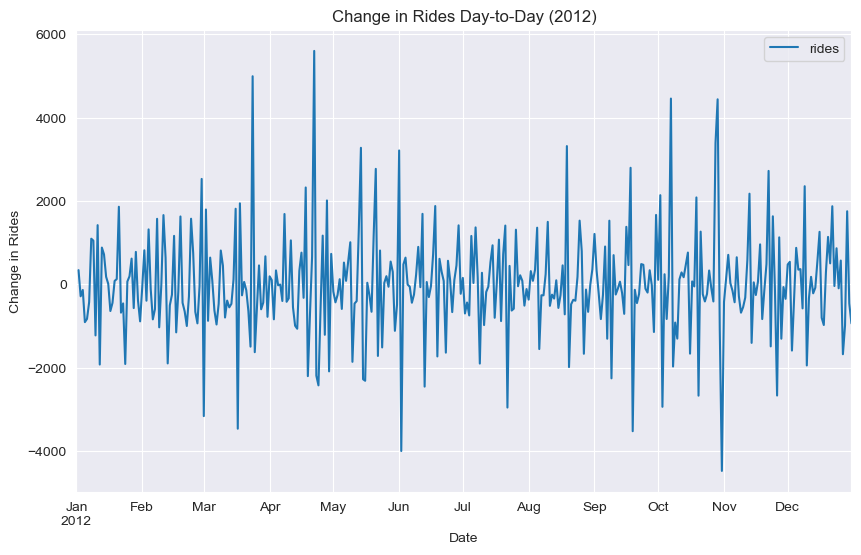

In [90]:
rides_2012 = df[df["yr"] == 1].resample("D", on="day_date").agg({"cnt": "sum"}).rename({"cnt": "rides"}, axis=1)
rides_change_2012 = rides_2012.shift(1) - rides_2012
rides_change_2012.plot(figsize=(10,6), title="Change in Rides Day-to-Day (2012)", xlabel="Date", ylabel="Change in Rides")
plt.show()

In [91]:
# The biggest change in 2012 was on 29th of October - it was the hurricane Sandy

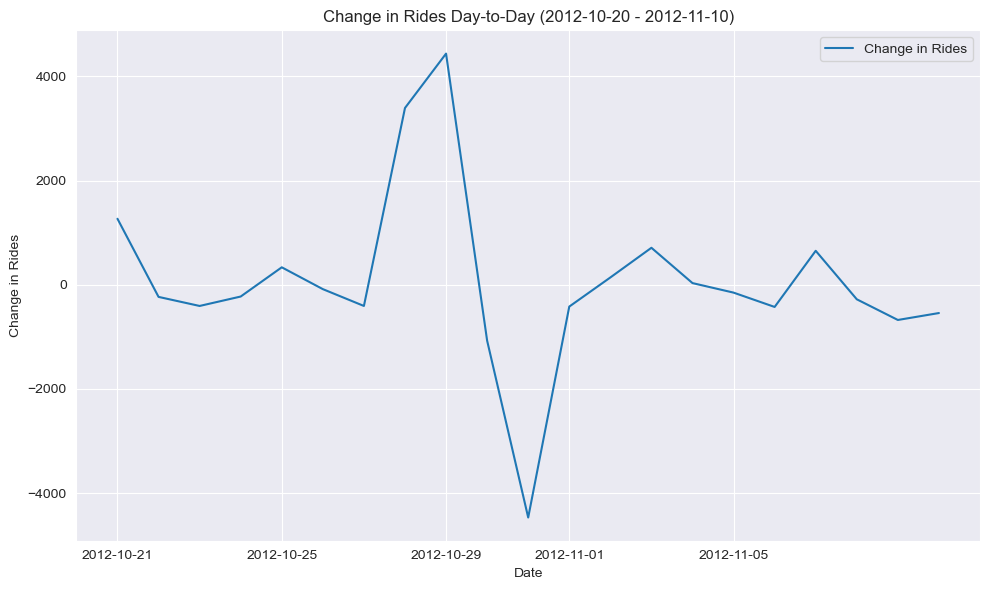

In [92]:
display_change("2012-10-20", "2012-11-10", df)

In [93]:
# what about the hours? let's se when the traffic is the most intense

In [94]:
hourly_rides = df.groupby(["hr"]).agg({"cnt": "mean"}).rename({"cnt": "average_rides"}, axis=1)

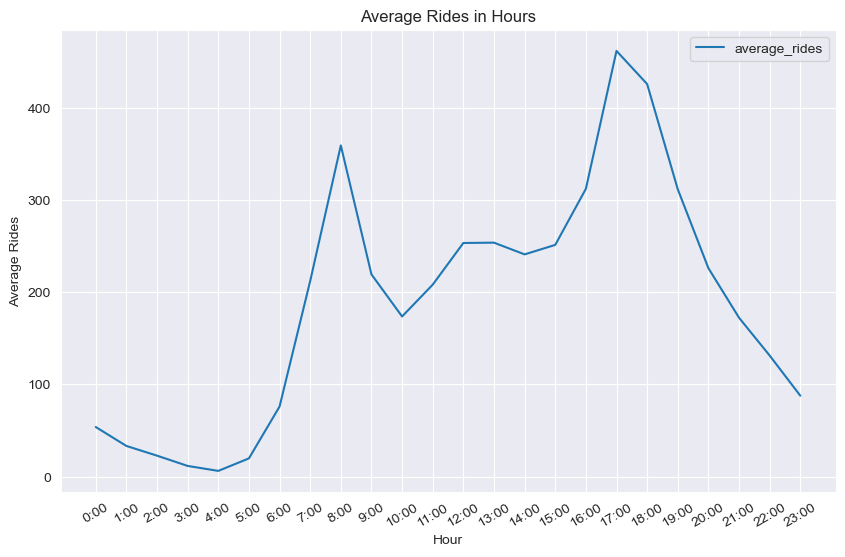

In [95]:
ax = hourly_rides.plot(figsize=(10,6), title="Average Rides in Hours", xlabel="Hour", ylabel="Average Rides", rot=30)
ax.set_xticks(np.arange(0,24))
ax.set_xticklabels([f"{i}:00" for i in range(24)])
plt.show()

In [96]:
# As we can see there is an increased number of rentals between 7-8AM and 5-6PM - it is the time when people are going to work and coming back home

In [97]:
# let's see how the number changes between weekdays and weekends

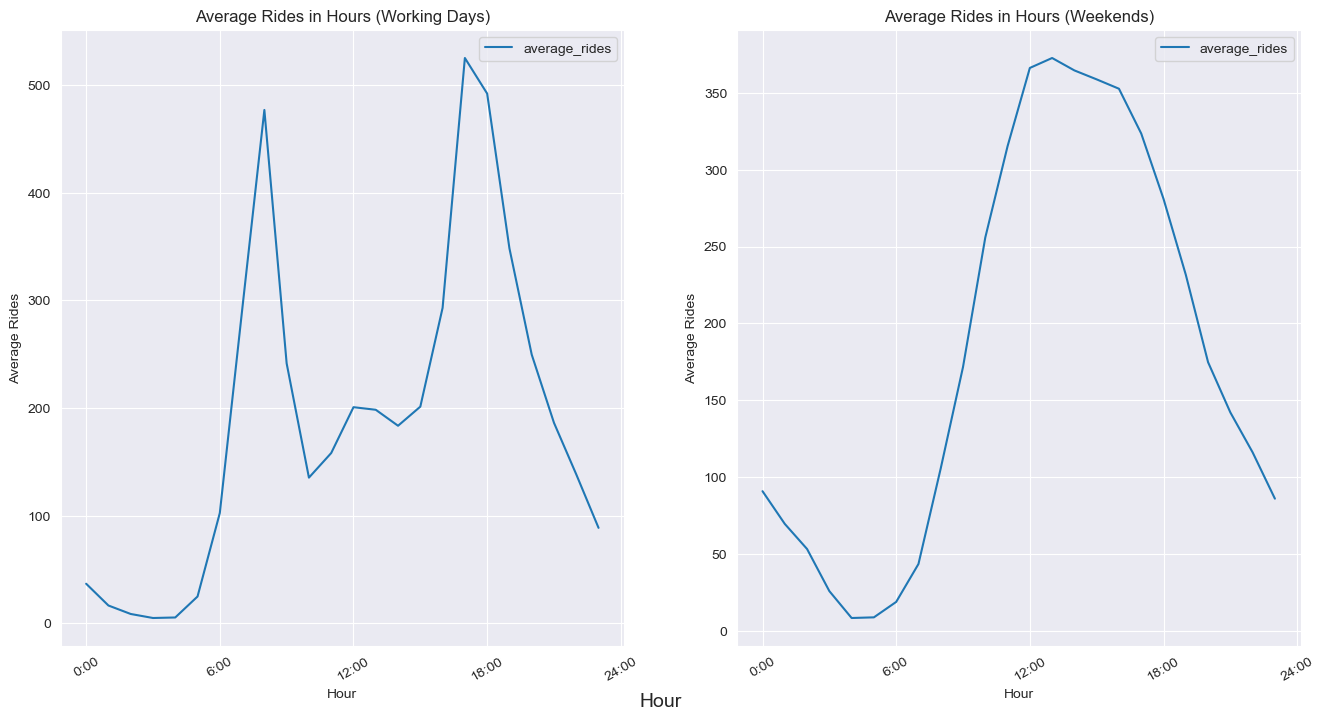

In [98]:
hourly_rides_weekday = df[df["workingday"] == 1].groupby(["hr"]).agg({"cnt": "mean"}).rename({"cnt": "average_rides"}, axis=1)
hourly_rides_weekend = df[df["workingday"] == 0].groupby(["hr"]).agg({"cnt": "mean"}).rename({"cnt": "average_rides"}, axis=1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.text(0.5, 0.04, 'Hour', ha='center', va='center', fontsize=14)

ax1 = hourly_rides_weekday.plot(ax=ax1, title="Average Rides in Hours (Working Days)", xlabel="Hour", ylabel="Average Rides", rot=30)
ax1.set_xticks(np.arange(0,30,6))
ax1.set_xticklabels([f"{i}:00" for i in ax1.get_xticks()])
ax2 = hourly_rides_weekend.plot(ax=ax2, title="Average Rides in Hours (Weekends)", xlabel="Hour", ylabel="Average Rides", rot=30)

ax2.set_xticks(np.arange(0,30,6))
ax2.set_xticklabels([f"{i}:00" for i in ax2.get_xticks()])
plt.show()

In [99]:
# as we can see the structure of the traffic is different on working days and weekends - on working days there are two peaks - in the morning and in the evening
# on weekends the peak is in the afternoon and is a bit longer
# we could not see the difference in the previous plot as the data was averaged and there is a lot more working days than weekends

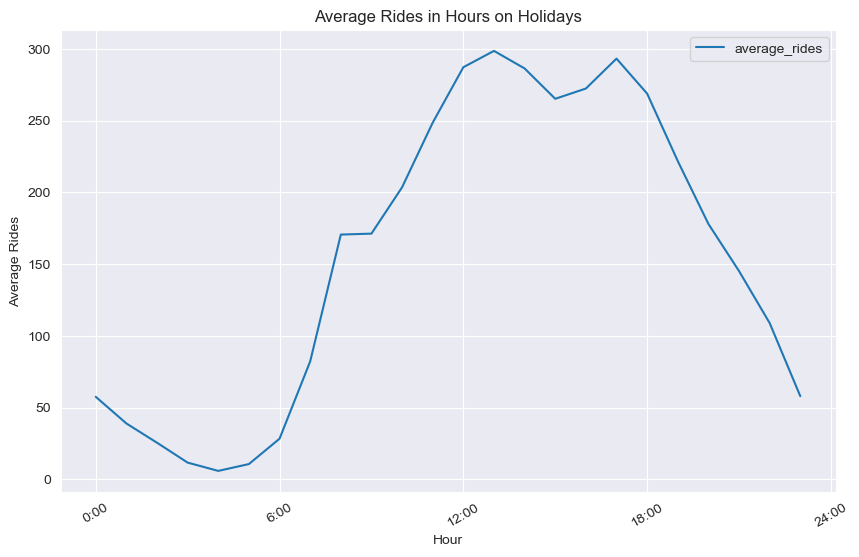

In [100]:
# lets plot the distribution in holidays
holiday_groups = df[df["holiday"] == 1].groupby(["hr"]).agg({"cnt": "mean"}).rename({"cnt": "average_rides"}, axis=1)
ax = holiday_groups.plot(figsize=(10,6), title="Average Rides in Hours on Holidays", xlabel="Hour", ylabel="Average Rides", rot=30)
ax.set_xticks(np.arange(0,30,6))
ax.set_xticklabels([f"{i}:00" for i in ax2.get_xticks()])
plt.show()

In [101]:
# the holiday distribution is similar to the weekend distribution.

<AxesSubplot:>

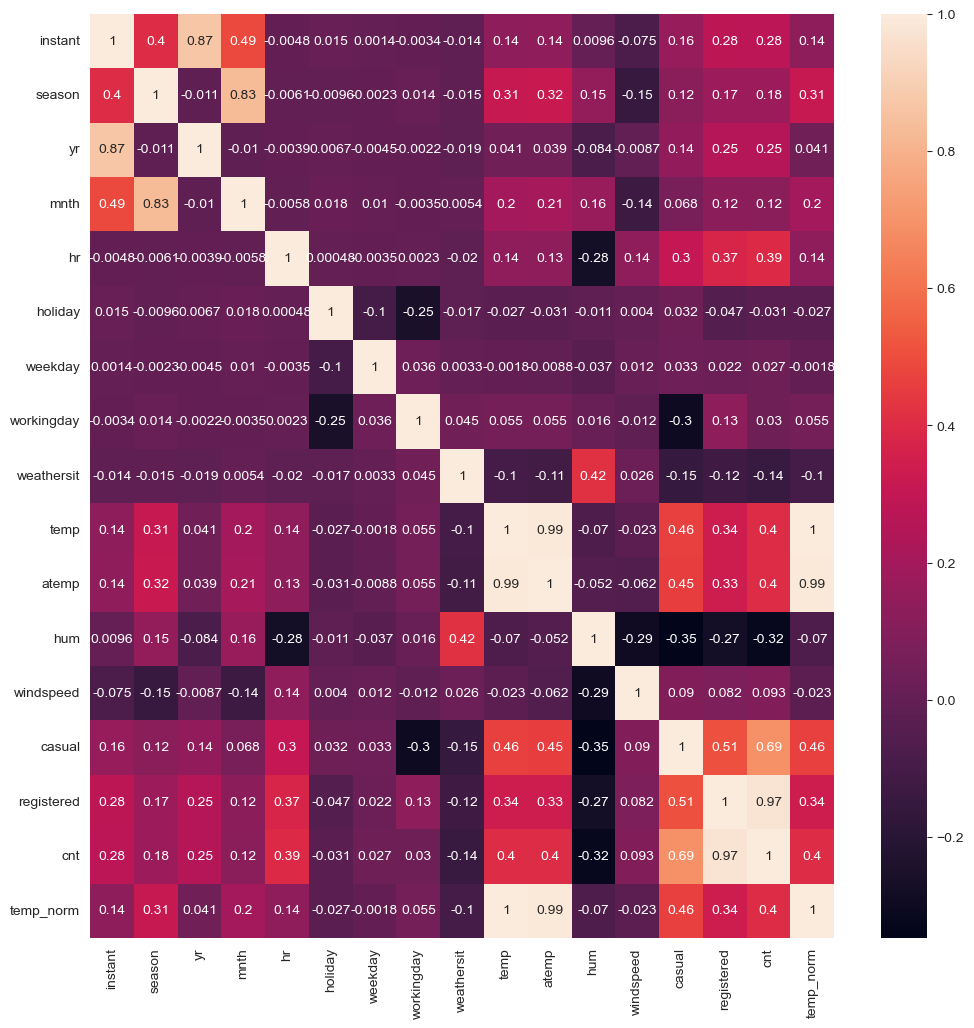

In [102]:
# lets look at the correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

In [103]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_norm,day_date
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,9.8,2011-01-01
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,9.0,2011-01-01
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,9.0,2011-01-01
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,9.8,2011-01-01
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,9.8,2011-01-01


In [104]:
# As I am going to be predicting the cnt column I will drop the casual and registered columns
df.drop(["casual", "registered"], axis=1, inplace=True)

In [105]:
def cyclical_encoding(df, column, max_val):
    df[column + "_sin"] = np.sin(2 * np.pi * df[column] / max_val)
    df[column + "_cos"] = np.cos(2 * np.pi * df[column] / max_val)
    return df